In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math
import statistics
from scipy import stats

In [ ]:
#runs an offline simulation using:
    #a directedness model
    #some initial ground truth data to begin making predictions
    #a specification of a time-varying EF
#and returns the entire predicted time series
#this function accepts four arguments:
    #model is a keras model that accepts two features (ef and dir) with a lookback of 20 timesteps
    #init is the initial ground truth data in the form of a dataframe (only the first 20 rows will be used)
    #ef_series is a np array with shape (n,2) where the first col is efs occuring for timesteps after 
        #the ground truth 20 timesteps
    #cols is the columns to use as input
#and returns the ef_series array with the dir column filled in
def run_sim(model, init, ef_series, cols=['volt', 'cum_dir']):
    ground = init[cols].to_numpy()
    ground = ground[:20,:]
    
    ef_series = np.concatenate((ground,ef_series), axis=0)
    
    for i in range(20,len(ef_series)):
        ef_series[i,1] = model.predict(ef_series[i-20:i,:].reshape(1,20,2))
    
    return ef_series

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Load S2 & S3 Polarity Switch data
print('Loading ground truth data...')
df = pd.read_csv('/content/drive/My Drive/SwitchPolarity/combined_csv_new.csv')
df['volt'] = df['ef']/1000
print('Data loaded. Head of dataframe:')
df.tail()

Mounted at /content/drive
Loading ground truth data...
Data loaded. Head of dataframe:


,Unnamed: 0,track,slice,x,y,cum_dir,ef,set,volt
12076,1131,79,7,-4.930637,5.380700,-0.565598,50,2,0.05
12077,1132,79,8,-6.867506,4.591053,0.656674,50,2,0.05
12078,1133,80,6,-0.340509,-0.265019,0.000000,50,2,0.05
12079,1134,80,7,1.607123,5.876981,0.321752,50,2,0.05
12080,1135,80,8,2.554091,6.422343,0.432053,50,2,0.05


In [ ]:
# Load CNCC prediction model
print('Loading model...')
model = keras.models.load_model('/content/drive/My Drive/SwitchPolarity/cncc_lstm.h5')
print('Model loaded.')

Loading model...
Model loaded.


In [ ]:
ef_series = []
for i in range(8):
    ef_series.append(0)
#for i in range(28):
    #ef_series.append(.025)
for i in range(28):
    ef_series.append(.050)
#for i in range(28):
    #ef_series.append(.075)
for i in range(28):
    ef_series.append(.100)
#for i in range(28):
    #ef_series.append(.125)
#for i in range(28):
    #ef_series.append(.150)
#for i in range(28):
    #ef_series.append(.175)
for i in range(28):
    ef_series.append(.200)
for i in range(28):
    ef_series.append(.400)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print(ef_series)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0


[[0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]

Track: 1
Track: 2
Track: 3
Track: 4
Track: 5
Track: 6
Track: 7
Track: 8
Track: 9
Track: 10
Track: 11
Track: 12
Track: 13
Track: 14
Track: 15
Track: 16
Track: 17
Track: 18
Track: 19
Track: 20
Track: 21
Track: 22
Track: 23
Track: 24
Track: 25
Track: 26
Track: 27
Track: 28
Track: 29
Track: 30
Track: 31
Track: 32
Track: 33
Track: 34
Track: 35
Track: 36
Track: 37
Track: 38
Track: 39
Track: 40
Track: 41
Track: 42


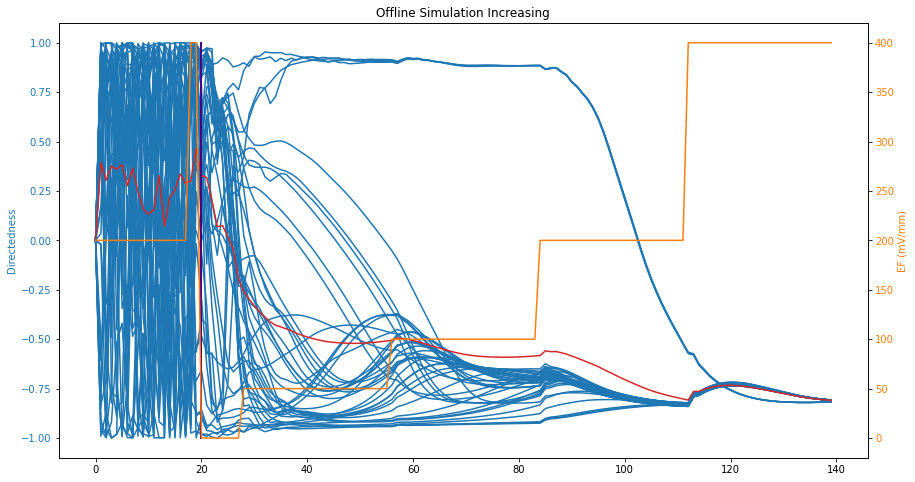

In [ ]:
fig, axs = plt.subplots()
ax2 = axs.twinx()


results = []

for track in range(1,43):
    print('Track: {}'.format(track))
    
    init = df.loc[(df['track']==track)&(df['set']==2)] #&(df['ef']==0)

    result = run_sim(model, init, ef_series)
    results.append(result)
    
    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_title('Offline Simulation Increasing')
ax2.set_xlabel('Timesteps (5min/step)')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(results[0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
avg_dirs = []
for i in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[i,1]
    avg = avg/len(results)
    avg_dirs.append(avg)
    
color = 'tab:red'
axs.plot(avg_dirs, color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)

#plt.savefig('figures/offline_increasing.pdf')

In [ ]:
len(df)

12081

[[0.4  0.4 ]
 [0.4  0.4 ]
 [0.4  0.4 ]
 [0.4  0.4 ]
 [0.4  0.4 ]
 [0.4  0.4 ]
 [0.4  0.4 ]
 [0.4  0.4 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.2  0.2 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.1  0.1 ]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]
 [0.05 0.05]

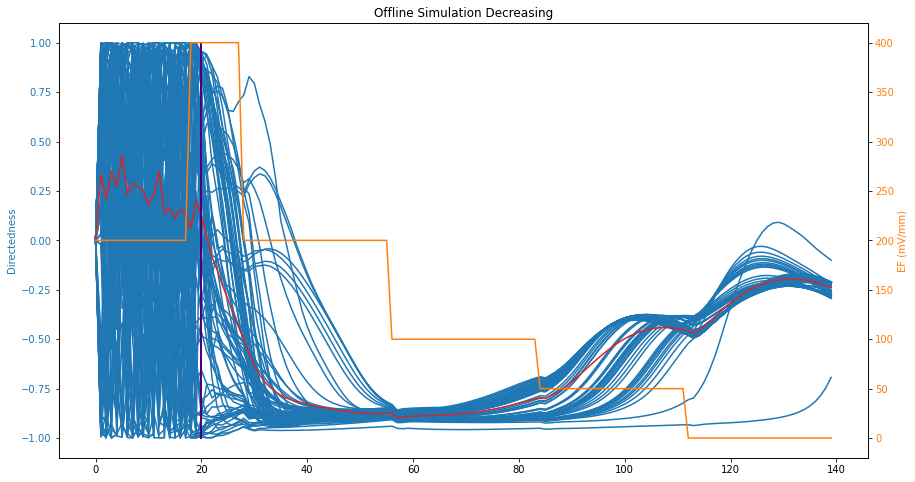

In [ ]:
ef_series = []
for i in range(8):
    ef_series.append(.4)
for i in range(28):
    ef_series.append(.2)
for i in range(28):
    ef_series.append(.1)
for i in range(28):
    ef_series.append(.050)
for i in range(28):
    ef_series.append(0)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print(ef_series)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0


fig, axs = plt.subplots()
ax2 = axs.twinx()


results = []

for track in range(1,80):
    print('Track: {}'.format(track))
    
    init = df.loc[(df['track']==track)&(df['set']==2)] #&(df['ef']==0)

    result = run_sim(model, init, ef_series)
    results.append(result)
    
    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_title('Offline Simulation Decreasing')
ax2.set_xlabel('Timesteps (5min/step)')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(results[0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
avg_dirs = []
for i in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[i,1]
    avg = avg/len(results)
    avg_dirs.append(avg)
    
color = 'tab:red'
axs.plot(avg_dirs, color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)

#plt.savefig('figures/offline_decreasing.pdf')

[[0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.1 0.1]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]

KeyboardInterrupt: ignored

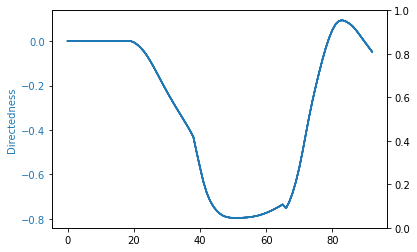

In [ ]:
ef_series = []
for i in range(28):
    ef_series.append(0.1)
for i in range(28):
    ef_series.append(0.0)
for i in range(28):
    ef_series.append(0.1)
for i in range(28):
    ef_series.append(0.0)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print(ef_series)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0


fig, axs = plt.subplots()
ax2 = axs.twinx()


results = []

for track in range(1,43):
    print('Track: {}'.format(track))
    
    init = df.loc[(df['track']==track)&(df['ef']==0)&(df['set']==2)]

    result = run_sim(model, init, ef_series)
    results.append(result)
    
    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_title('Offline Simulation Pulse')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(results[0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)

axs.set_xlabel('Timesteps (5min/step)')
    
avg_dirs = []
for i in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[i,1]
    avg = avg/len(results)
    avg_dirs.append(avg)
    
color = 'tab:red'
axs.plot(avg_dirs, color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)

[[ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [ 0.4  0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]
 [-0.4 -0.4]]
shape of series: (60, 2)
Track: 1
Track: 2
Track: 3
Track: 4
Track: 5
Track: 6
Track: 7
Track: 8
Track: 9
Track: 10
Track: 11
Track: 12
Track: 13
Track: 14
Track: 15
Track: 16
Track: 17
Track: 18
Track: 19
Track: 20
Tra

IndexError: ignored

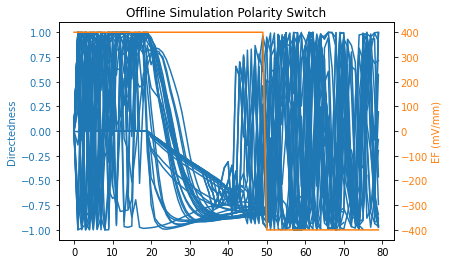

In [ ]:
ef_series = []
for i in range(30):
    ef_series.append(.400)
for i in range(30):
    ef_series.append(-.400)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print(ef_series)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0


fig, axs = plt.subplots()
ax2 = axs.twinx()


results = []

for track in range(1,43):
    print('Track: {}'.format(track))
    
    init = df.loc[(df['track']==track)&(df['set']==2)] #(df['ef']==0)&

    result = run_sim(model, init, ef_series)
    results.append(result)
    
    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_title('Offline Simulation Polarity Switch')
ax2.set_xlabel('Timesteps (5min/step)')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(results[0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
avg_dirs = []
for i in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[i,1]
    avg = avg/len(results)
    avg_dirs.append(avg)
    
color = 'tab:red'
axs.plot(avg_dirs, color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)



[[-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]
 [-0.2 -0.2]]
shape of series: (28, 2)
Track: 1
Track: 2
Track: 3
Track: 4
Track: 5
Track: 6
Track: 7
Track: 8
Track: 9
Track: 10
Track: 11
Track: 12
Track: 13
Track: 14
Track: 15
Track: 16
Track: 17
Track: 18
Track: 19
Track: 20
Track: 21
Track: 22
Track: 23
Track: 24
Track: 25
Track: 26
Track: 27
Track: 28
Track: 29
Track: 30
Track: 31
Track: 32
Track: 33
Track: 34
Track: 35
Track: 36
Track: 37
Track: 38
Track: 39
Track: 40
Track: 41
Track: 42


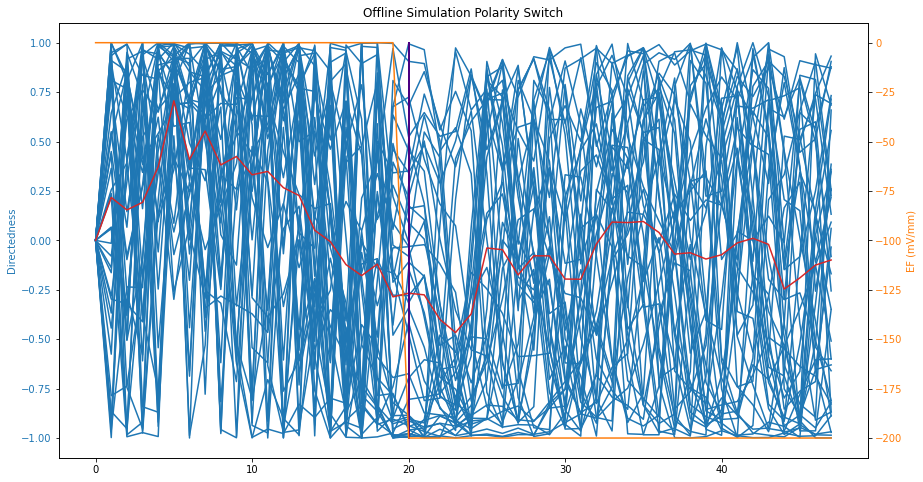

In [ ]:
ef_series = []

for i in range(28):
    ef_series.append(-.200)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print(ef_series)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0


fig, axs = plt.subplots()
ax2 = axs.twinx()


results = []

for track in range(1,43):
    print('Track: {}'.format(track))
    
    init = df.loc[(df['track']==track)&(df['ef']==0)&(df['set']==2)]

    result = run_sim(model, init, ef_series)
    results.append(result)
    
    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_title('Offline Simulation Polarity Switch')
ax2.set_xlabel('Timesteps (5min/step)')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(results[0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
avg_dirs = []
for i in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[i,1]
    avg = avg/len(results)
    avg_dirs.append(avg)
    
color = 'tab:red'
axs.plot(avg_dirs, color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)

[[ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [-0.1 -0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]

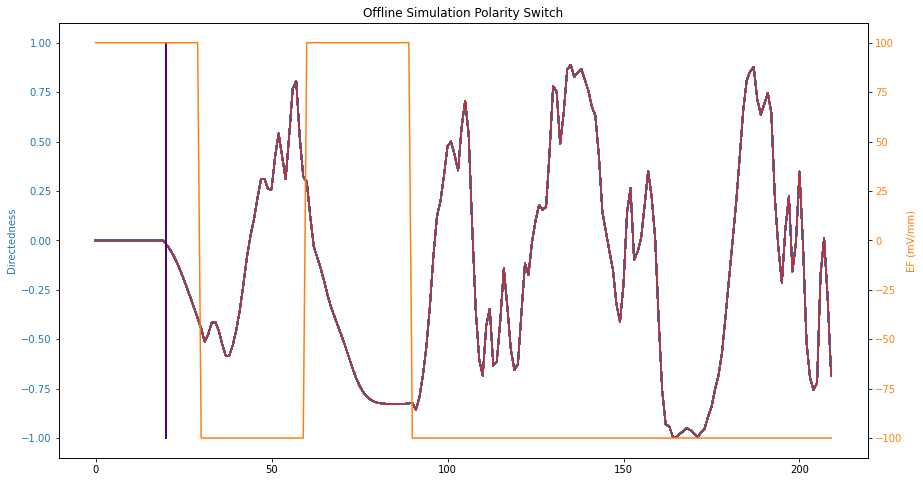

In [ ]:
ef_series = []

for i in range(30):
    ef_series.append(.100)
for i in range(30):
    ef_series.append(-.100)
for i in range(30):
    ef_series.append(.100)
for i in range(120):
    ef_series.append(-.100)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print(ef_series)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0


fig, axs = plt.subplots()
ax2 = axs.twinx()


results = []

for track in range(1,106):
    print('Track: {}'.format(track))
    
    init = df.loc[(df['track']==track)&(abs(df['ef']) ==400)&(df['set']==2) ] #
    init = df.loc[(df['track']==track)&(df['ef']==400)&(df['ef']==-400)&(df['ef']==200)&(df['set']==2)]
    result = run_sim(model, init, ef_series)
    results.append(result)
    
    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

color = 'tab:orange'
ax2.set_title('Offline Simulation Polarity Switch')
ax2.set_xlabel('Timesteps (5min/step)')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(results[0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
    
avg_dirs = []
for i in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[i,1]
    avg = avg/len(results)
    avg_dirs.append(avg)
    
color = 'tab:red'
axs.plot(avg_dirs, color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)

Constant EF Simulations
Do simulations for each EF strength, and get final directedness values
Compare those with actual final directedness

In [ ]:
final_dirs = {}
all_res = {}
avg_dirs = {}

shape of series: (17, 2)


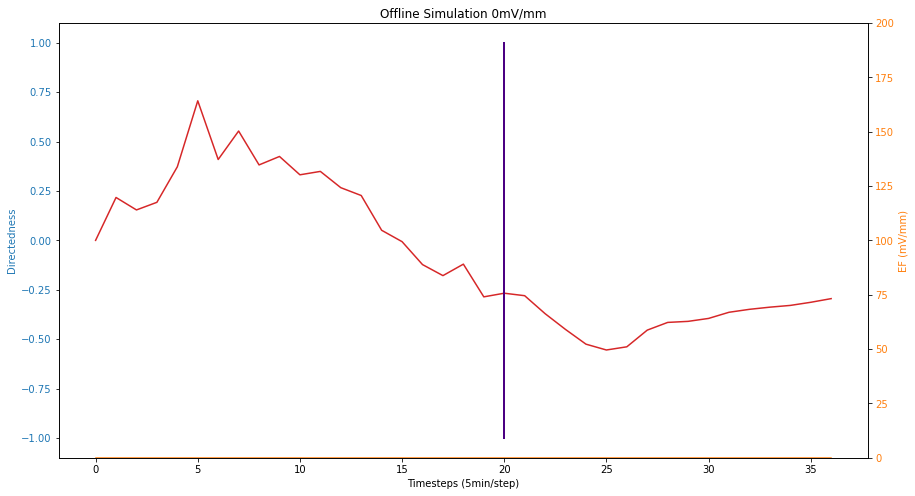

In [ ]:
final_dirs[0] = []
ef_series = []
for i in range(17):
    ef_series.append(0)

ef_series=np.array(ef_series)
ef_series = np.stack([ef_series, ef_series],1)

print('shape of series: {}'.format(ef_series.shape))

for i in range(len(ef_series)):
    ef_series[i][1] = 0
    
fig, axs = plt.subplots()
ax2 = axs.twinx()


final_dirs[0].append([])

results = []

for track in range(1,43):
    init = df.loc[(df['track']==track)&(df['ef']==0)&(df['set']==2)]

    result = run_sim(model, init, ef_series)
    results.append(result)
    final_dirs[0][0].append(result[-1,1])

    color = 'tab:blue'
    axs.set_ylabel('Directedness', color=color)
    #axs.plot(result[:,1], color=color)
    axs.tick_params(axis='y', labelcolor=color)

all_res[0] = results

axs.set_xlabel('Timesteps (5min/step)')
color = 'tab:orange'
ax2.set_title('Offline Simulation 0mV/mm')
ax2.set_ylabel('EF (mV/mm)', color=color)
ax2.plot(all_res[0][0][:,0]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,200])

avg_dirs[(0,0)] = []
for k in range(len(results[0][:,0])):
    avg = 0
    for j in range(len(results)):
        result = results[j]
        avg = avg + result[k,1]
    avg = avg/len(results)
    avg_dirs[(0,0)].append(avg)

color = 'tab:red'
#axs.plot(avg_dirs, color=color)

axs.plot(avg_dirs[(0,0)], color=color)

axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

fig.set_size_inches(14.5, 8)

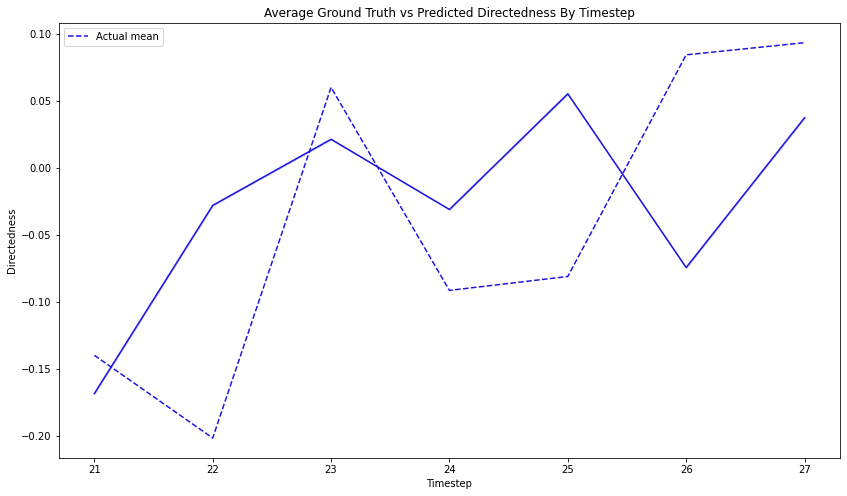

In [ ]:

df = pd.read_csv('/content/drive/My Drive/SwitchPolarity/switchPolarity_predictions_s2_3.csv')
test = df[(df['set']==2)]

efs = [0]
#efs = [50]
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(efs))))

fig, ax = plt.subplots()
fig.set_size_inches(14, 8) # set figure size
#for i in range(len(efs)):
    #ax.plot([0,1], [i, 2*i])

max_avs = {}
mean_avs = {}
min_avs = {}

act_means = {}
act_stds = {}
for ef in efs:
    results = all_res[ef]
    
    this_ef = test[test['ef']==ef]
    max_av = [] #max model-average dir prediction for each slice of this EF
    mean_av = [] #mean model-average dir prediction for each slice of this EF
    min_av = [] #min model-average dir prediction for each slice of this EF
    
    act_mean = [] #mean true dir value for each slice of this EF
    act_std = [] #std dev of mean true dir value for each slice of this EF
    
    for sl in range(21,28): #loop through slices where predictions are made
        this_slice = this_ef[this_ef['slice']==sl]
        
        act_mean.append(statistics.mean(this_slice['cum_dir']))
        act_std.append(statistics.stdev(this_slice['cum_dir']))
        
        all_avs = [] #list of the average predicted directedness for this ef+slice for each model
        this_model = this_slice['pred_dir{}'.format(1)].dropna()
        all_avs.append(statistics.mean(this_model))
        
        max_av.append(max(all_avs))
        mean_av.append(statistics.mean(all_avs))
        min_av.append(min(all_avs))
        
    max_avs[ef] = max_av
    mean_avs[ef] = mean_av
    min_avs[ef] = min_av
    act_means[ef] = act_mean
    act_stds[ef] = act_std
    
colors = ['#1e14de','#1873db','#2be3e0','#25c460','#ede72b','#ebba28','#db3627']

lines = []
for i in range(len(efs)):
    ef = efs[i]
    #max_plot = plt.plot(range(21,38),max_avs[ef], color='k')
    line, = plt.plot(range(21,28),mean_avs[ef], color=colors[i])
    lines.append(line)
    #min_plot = plt.plot(range(21,38),min_avs[ef], color='k')
    plt.fill_between(range(21,28),min_avs[ef],max_avs[ef], color=colors[i], alpha=0.3)
    
    plt.plot(range(21,28),act_means[ef], color=colors[i], linestyle='--', label = 'Actual mean') #actual mean
ax.legend(lines, map('{}mV/mm'.format,efs))
ax.set_xlabel('Timestep')
ax.set_ylabel('Directedness')
ax.set_title('Average Ground Truth vs Predicted Directedness By Timestep')
plt.legend()        
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f3e251d8310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3e25188ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e2518eb10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e2518e5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3e25188050>,
  <matplotlib.lines.Line2D at 0x7f3e25188590>]}

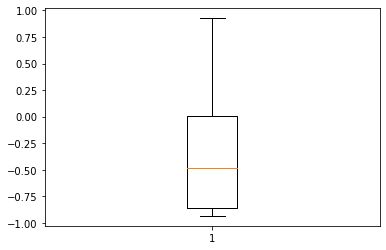

In [ ]:
dirs_list = []
for ef in [0]:
    thisbox = []
    for i in range(1):
        #thisbox.append(sum(final_dirs[ef][i])/len(final_dirs[ef][i]))
        for direction in final_dirs[ef][i]:
            thisbox.append(direction)
    dirs_list.append(thisbox)
plt.boxplot(dirs_list)

{'boxes': [<matplotlib.lines.Line2D at 0x7f3e250d5810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3e250da890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e250e18d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e250e1390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3e250d5dd0>,
  <matplotlib.lines.Line2D at 0x7f3e250da350>]}

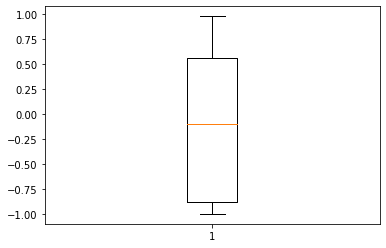

In [ ]:
real_finals = []
for ef in [0]:
    real_finals.append(df[(df['set']==2) & (df['slice']==28) & (df['ef']==ef)]['cum_dir'])

plt.boxplot(real_finals)

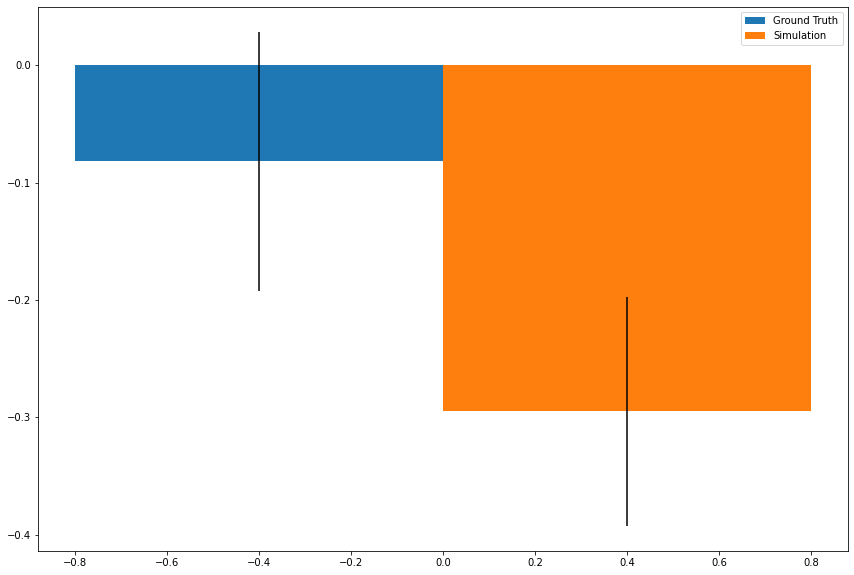

In [ ]:
sim_means = []
sim_devs = []
real_means = []
real_devs = []
for i in range(1):
    sim_means.append(statistics.mean(dirs_list[i]))
    sim_devs.append(stats.sem(dirs_list[i]))
    real_means.append(statistics.mean(real_finals[i]))
    real_devs.append(stats.sem(real_finals[i]))

sim_pos = []
real_pos = []
for i in range(1):
    real_pos.append(2*i-0.4)
    sim_pos.append(2*i+0.4)
    
fig, ax = plt.subplots()
fig.set_size_inches(14.5, 10)
ax.bar(real_pos, real_means, yerr=real_devs)
ax.bar(sim_pos, sim_means, yerr=sim_devs)
ax.legend(['Ground Truth','Simulation'])

In [ ]:
efs = [0]
for ef in efs:
    print('Simulating with constant EF at {}mV/mm'.format(ef))
    final_dirs[ef] = []
    
    ef_series = []
    for i in range(1):
        ef_series.append(ef/1000)

    ef_series=np.array(ef_series)
    ef_series = np.stack([ef_series, np.zeros(ef_series.shape)],1)

    print('shape of series: {}'.format(ef_series.shape))


    final_dirs[ef].append([])

    results = []

    for track in range(1,43):
        init = df.loc[(df['track']==track)&(df['ef']==ef)&(df['set']==2)]

        result = run_sim(model, init, ef_series)
        results.append(result)
        final_dirs[0][i].append(result[-1,1])
        
        for j in range(len(result)):
            df.loc[(df['track']==track)&(df['ef']==ef)&(df['set']==2)&(df['slice']==21+j),'sim{}'.format(i)] = result[j,1]
    

    print(df.head(40))

Simulating with constant EF at 0mV/mm
shape of series: (1, 2)
    Unnamed: 0  track  slice          x          y   cum_dir  ef  set  volt  \
0            0      1      1   0.000000   0.000000  0.000000   0    2   0.0   
1            1      1      2   3.208460  -0.187115  0.998304   0    2   0.0   
2            2      1      3  -0.710196   0.528954 -0.983711   0    2   0.0   
3            3      1      4  -1.811726   0.059887 -0.920055   0    2   0.0   
4            4      1      5  -0.115205  -0.075329  0.996839   0    2   0.0   
5            5      1      6   5.799938   0.544160  0.994561   0    2   0.0   
6            6      1      7  16.032835   2.988950  0.972626   0    2   0.0   
7            7      1      8  27.241468   5.213829  0.980863   0    2   0.0   
8            8      1      9  36.513283  10.619072  0.863913   0    2   0.0   
9            9      1     10  41.520762  13.326704  0.879641   0    2   0.0   
10          10      1     11  53.411182  16.784927  0.960213   0    2

In [ ]:
efs = [0]

for ef in efs:
  print('Simulating with constant EF at {}mV/mm'.format(ef))

  ef_series = []
  for _ in range(117):
      ef_series.append(ef/1000)

  ef_series=np.array(ef_series)
  ef_series = np.stack([ef_series, np.zeros(ef_series.shape)],1)

  print('shape of series: {}'.format(ef_series.shape))

  results = []

  for track in range(1,43):
      init = df.loc[(df['track']==track)&(df['ef']==ef)&(df['set']==2)]

      result = run_sim(model, init, ef_series)
      results.append(result)

      for j in range(len(result)-20):
          df.loc[(df['track']==track)&(df['ef']==ef)&(df['set']==2)&(df['slice']==21+j),'sim{}'.format(i)] = result[j+20,1]



Simulating with constant EF at 0mV/mm
shape of series: (117, 2)


In [ ]:
print('Writing to CSV')
df.to_csv('/content/drive/My Drive/SwitchPolarity/sims.csv'.format(ef), index=False)

Writing to CSV


EF: 0
shape of series: (1, 2)


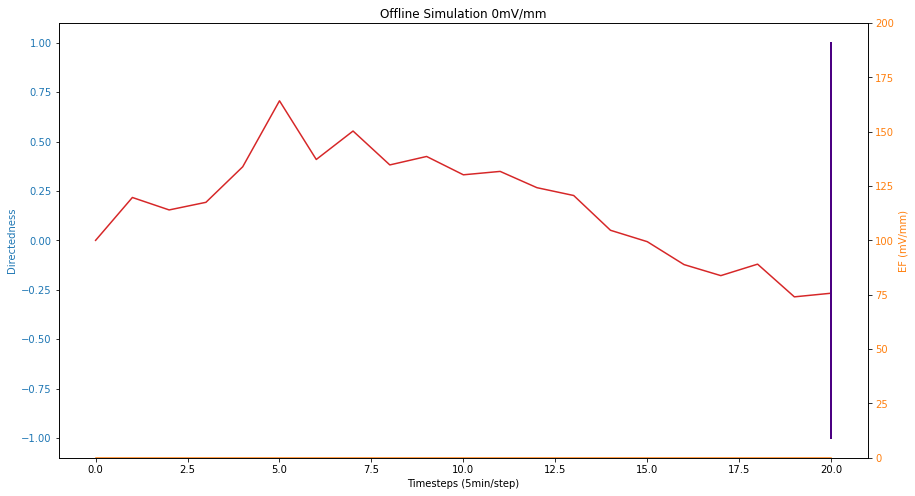

In [ ]:
efs = [0]
for ef in efs:
    print('EF: {}'.format(ef))
    final_dirs[ef] = []
    ef_series = []
    for i in range(1):
        ef_series.append(ef/1000)

    ef_series=np.array(ef_series)
    ef_series = np.stack([ef_series, ef_series],1)

    print('shape of series: {}'.format(ef_series.shape))

    for i in range(len(ef_series)):
        ef_series[i][1] = 0

    fig, axs = plt.subplots()
    ax2 = axs.twinx()

    
    final_dirs[ef].append([])

    results = []

    for track in range(1,43):
        init = df.loc[(df['track']==track)&(df['ef']==ef)&(df['set']==2)]

        result = run_sim(model, init, ef_series)
        results.append(result)
        final_dirs[ef][i].append(result[-1,1])

        color = 'tab:blue'
        axs.set_ylabel('Directedness', color=color)
        #axs.plot(result[:,1], color=color)
        axs.tick_params(axis='y', labelcolor=color)

    all_res[ef] = results

    axs.set_xlabel('Timesteps (5min/step)')
    color = 'tab:orange'
    ax2.set_title('Offline Simulation {}mV/mm'.format(ef))
    ax2.set_ylabel('EF (mV/mm)', color=color)
    ax2.plot(all_res[ef][0][:,0]*1000, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([0,200])

    avg_dirs[(ef,1)] = []
    for k in range(len(results[0][:,0])):
        avg = 0
        for j in range(len(results)):
            result = results[j]
            avg = avg + result[k,1]
        avg = avg/len(results)
        avg_dirs[(ef,1)].append(avg)

    color = 'tab:red'
    #axs.plot(avg_dirs, color=color)

    
    axs.plot(avg_dirs[(ef,1)], color=color)

    axs.plot((20,20),(-1,1),color='#4b0082',linewidth=2)

    fig.set_size_inches(14.5, 8)